# Chess Popular Openings Analysis

Hello guys, i got this dataset from Kaggle. I'm interested in analysing which is the most popular opening. Also i want to inspect the win rates of a few specific openings and lines. 

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/datasnaek/chess' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: germanpaul
Your Kaggle Key: ········


100%|██████████| 2.77M/2.77M [00:00<00:00, 51.8MB/s]

The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './chess'

In [7]:
import os
os.listdir(data_dir)

['games.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "chess-analysis" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [43]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "germanpaul12/chess-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/germanpaul12/chess-analysis


'https://jovian.com/germanpaul12/chess-analysis'

## Data Preparation and Cleaning



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

In [13]:
df_data = pd.read_csv(f"{data_dir}/games.csv")

In [14]:
df_data.shape

(20058, 16)

In [15]:
df_data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Already here we see some interesting information about the dataset. We see that in the given dataset from Lichess. The average rating is about 1600 and the average moves is 60. You can see other interesting information for yourself.

In [16]:
df_data.sample(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11179,LtroB6lt,True,1.504473e+12,1.504473e+12,43,mate,white,5+8,sharparrow,1921,kishomat,1889,Nf3 e6 g3 d5 Bg2 Nf6 O-O c5 c4 Bd6 d4 cxd4 cxd...,A04,Zukertort Opening: Queen's Gambit Invitation,2
15091,0Ls9GUxT,True,1.502520e+12,1.502520e+12,78,mate,black,10+0,destroyer999,1458,chessmasterhex70,1404,e4 Nf6 e5 Nd5 c4 Nb6 d4 d6 exd6 exd6 Nf3 g6 h3...,B03,Alekhine Defense: Exchange Variation,9


In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "germanpaul12/chess-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/germanpaul12/chess-analysis


'https://jovian.com/germanpaul12/chess-analysis'

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We will start by looking how many games were rated and how many unrated.

<BarContainer object of 2 artists>

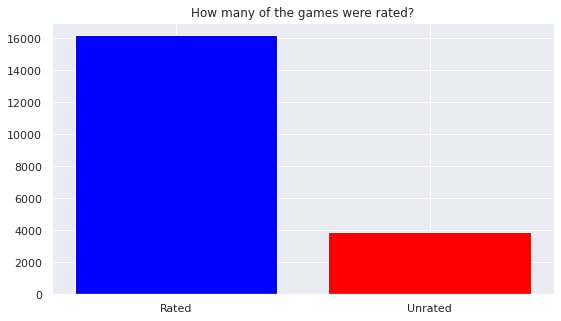

In [19]:
rated_count = df_data.rated.value_counts()

plt.title("How many of the games were rated?")
plt.bar(['Rated', 'Unrated'], rated_count, color=['blue', 'red'])

We see that the ratings of the players are normally distributed and averaging around 1500

<AxesSubplot:title={'center':'Ratings of the over 40,000 players rounded to the nearest 100'}, ylabel='count'>

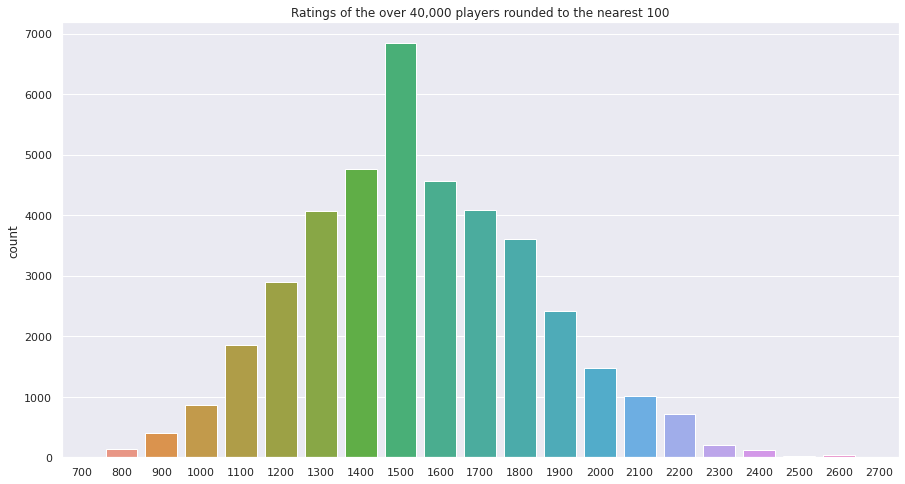

In [20]:
rating_rounded_100 = ((df_data['white_rating'].append(df_data['black_rating']) / 100).astype(int) *100)
plt.figure(figsize=(15,8))
plt.title("Ratings of the over 40,000 players rounded to the nearest 100")
sns.countplot(x=rating_rounded_100)

### We will analyse which openings are most often played by players rated over 2000 elo.

<AxesSubplot:ylabel='opening_name'>

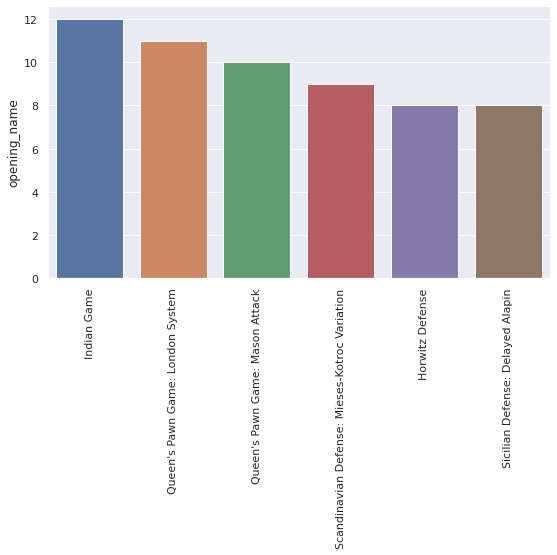

In [31]:
games_elo_over_2000 = df_data.where(df_data['white_rating']>2000).where(df_data['black_rating']>2000).dropna()
most_frequent_openings = games_elo_over_2000['opening_name'].value_counts()
X = most_frequent_openings.sort_values(ascending=False)[:6]
plt.xticks(rotation=90)
sns.barplot(x=X.index, y=X)

Let us save and upload our work to Jovian before continuing

In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "germanpaul12/chess-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/germanpaul12/chess-analysis


'https://jovian.com/germanpaul12/chess-analysis'

## Asking and Answering Questions




#### What is the average rating?

<AxesSubplot:title={'center':'Ratings of the over 40,000 players rounded to the nearest 100'}, ylabel='count'>

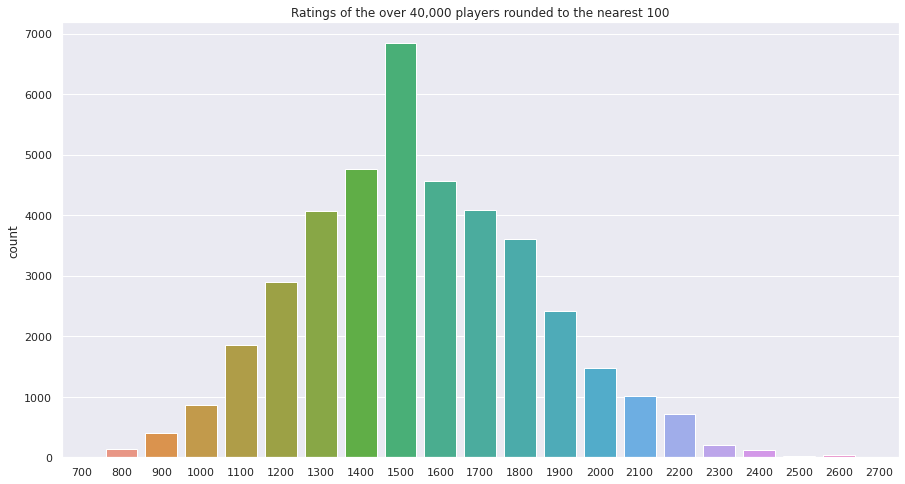

In [24]:
rating_rounded_100 = ((df_data['white_rating'].append(df_data['black_rating']) / 100).astype(int) *100)
plt.figure(figsize=(15,8))
plt.title("Ratings of the over 40,000 players rounded to the nearest 100")
sns.countplot(x=rating_rounded_100)

#### How did the games end?

In [33]:
victory_count = df_data.victory_status.value_counts()
victory_count

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

<BarContainer object of 4 artists>

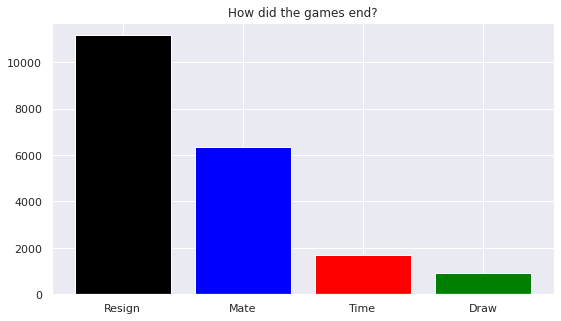

In [38]:
plt.title("How did the games end?")
plt.bar(['Resign', 'Mate', 'Time', 'Draw'], victory_count, color=['black', 'blue', 'red', 'green'])

#### Which color won more?

In [39]:
color_count = df_data.winner.value_counts()
color_count

white    10001
black     9107
draw       950
Name: winner, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb324b66550>,
 [Text(0.004824009568510416, 1.099989422190815, 'White'),
  Text(-0.1678393450515596, -1.0871200275280846, 'Black'),
  Text(1.0878456383046, -0.16307012976525642, 'Draw')],
 [Text(0.002631277946460226, 0.599994230285899, '50%'),
  Text(-0.09154873366448704, -0.5929745604698643, '45%'),
  Text(0.5933703481661454, -0.08894734350832167, '5%')])

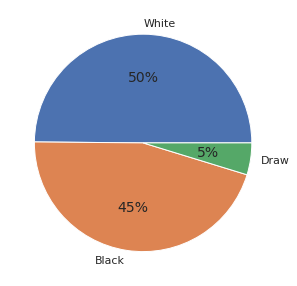

In [42]:
plt.pie(color_count, labels = ["White", "Black", "Draw"], autopct='%.0f%%')